In [1]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile

In [4]:
pasta_dados = '01'

In [5]:
dados_audio = []
for ficheiro in os.listdir(pasta_dados):
    if ficheiro.endswith('.wav'):
        caminho_completo = os.path.join(pasta_dados, ficheiro)
        partes_nome = ficheiro.replace('.wav', '').split('_')
        if len(partes_nome) == 3:
            digito = int(partes_nome[0])
            participante = partes_nome[1]
            repeticao = int(partes_nome[2])
            fs, sinal = wavfile.read(caminho_completo)
            dados_audio.append({
                'diretorio': pasta_dados,
                'nome_ficheiro': ficheiro,
                'participante': participante,
                'digito': digito,
                'repeticao': repeticao,
                'taxa_amostragem': fs,
                'sinal': sinal
            })

In [6]:
df = pd.DataFrame(dados_audio)
df = df.sort_values(by=['digito', 'repeticao']).reset_index(drop=True)
display(df.head())

,diretorio,nome_ficheiro,participante,digito,repeticao,taxa_amostragem,sinal
0,01,0_01_0.wav,01,0,0,48000,"[15, 14, 15, 15, 14, 15, 15, 14, 14, 14, 14, 1..."
1,01,0_01_1.wav,01,0,1,48000,"[2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, ..."
2,01,0_01_2.wav,01,0,2,48000,"[-29, -29, -29, -29, -30, -30, -30, -30, -30, ..."
3,01,0_01_3.wav,01,0,3,48000,"[3, 2, 3, 3, 3, 3, 4, 4, 3, 4, 5, 4, 3, 3, 3, ..."
4,01,0_01_4.wav,01,0,4,48000,"[25, 25, 25, 25, 24, 24, 25, 25, 25, 25, 26, 2..."


In [7]:
import matplotlib.pyplot as plt

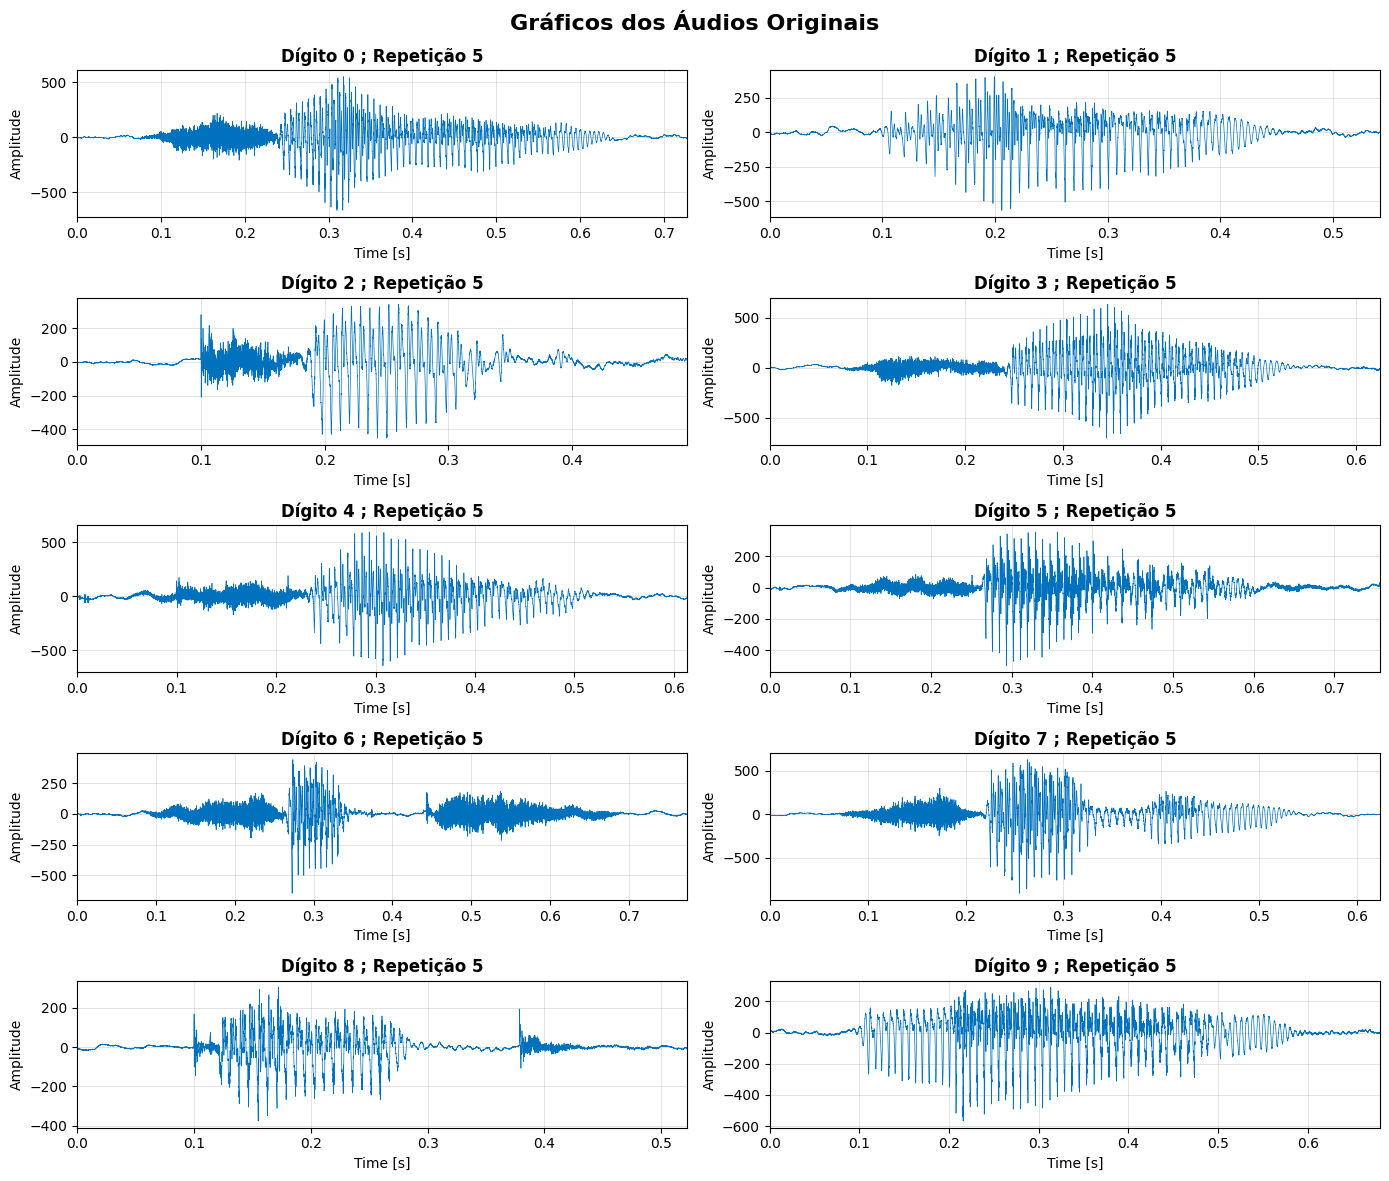

In [ ]:
plt.style.use('default')
df_rep5 = df[df['repeticao'] == 5].sort_values(by='digito')
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 12))
fig.suptitle('Gráficos dos Áudios Originais', fontsize=16, fontweight='bold')
for i, ax in enumerate(axes.flatten()):
    if i < len(df_rep5):
        linha = df_rep5.iloc[i]
        sinal = linha['sinal']
        fs = linha['taxa_amostragem']
        digito = linha['digito']
        repeticao = linha['repeticao']
        tempo_segundos = np.arange(len(sinal)) / fs
        ax.plot(tempo_segundos, sinal, color='#0072BD', linewidth=0.5) 
        ax.set_title(f'Dígito {digito} ; Repetição {repeticao}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('Amplitude')
        ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.5)
        ax.set_xlim([0, tempo_segundos[-1]])
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()